In [2]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import re
import ast
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('cpu_csv.csv')

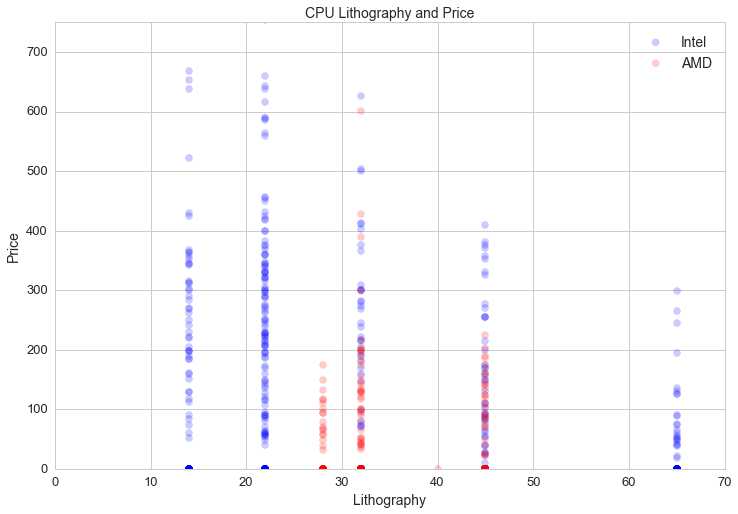

In [4]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
plt.axis([0,70,0,750])
plt.xlabel('Lithography', fontsize=14)
plt.title('CPU Lithography and Price', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.scatter(df[df.Manufacturer=="Intel"].Lithography, df[df.Manufacturer=="Intel"].avg, alpha=.2, color='blue', s=50)
plt.scatter(df[df.Manufacturer=="AMD"].Lithography, df[df.Manufacturer=="AMD"].avg, alpha=.2, color='red', s=50 )
plt.legend(['Intel','AMD'], fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu/lith_vs_price.png'))

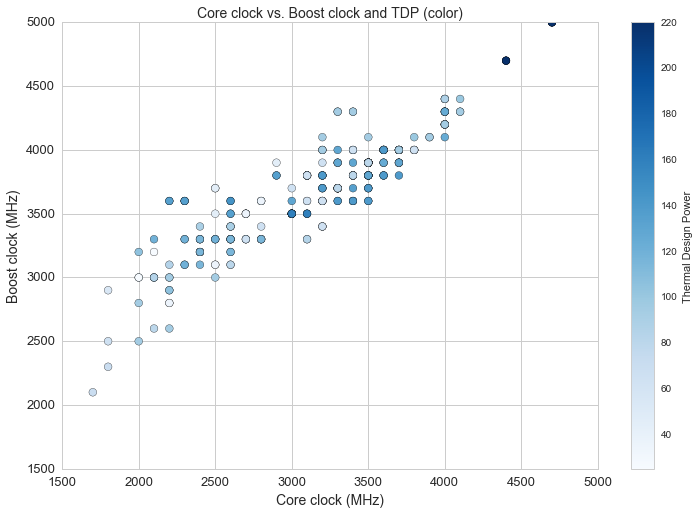

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(111)
df1 = df[(df.opfreq>0)&(df.turbo>0)]
plt.scatter(df1.opfreq, df1.turbo ,c=df1.TDP, s=60, cmap='Blues')
plt.colorbar(label='Thermal Design Power')
plt.title('Core clock vs. Boost clock and TDP (color)', fontsize=14)
plt.ylabel('Boost clock (MHz)', fontsize=14)
plt.xlabel('Core clock (MHz)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.axis([1500,5000,1500,5000])
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu/core_v_boost.png'))

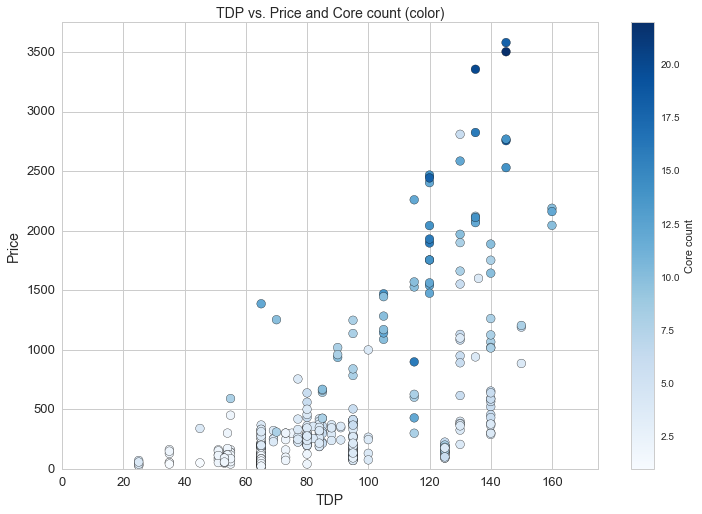

In [6]:
plt.figure(figsize=(12,8))
plt.axis([0,175,0,3750])
df1 = df[df.avg>0]
plt.scatter(df1.TDP, df1.avg, c=df1.Cores, s=75, cmap='Blues')
plt.colorbar(label='Core count')
plt.title('TDP vs. Price and Core count (color)', fontsize=14)
plt.xlabel('TDP', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu/TDP_vs_price.png'))

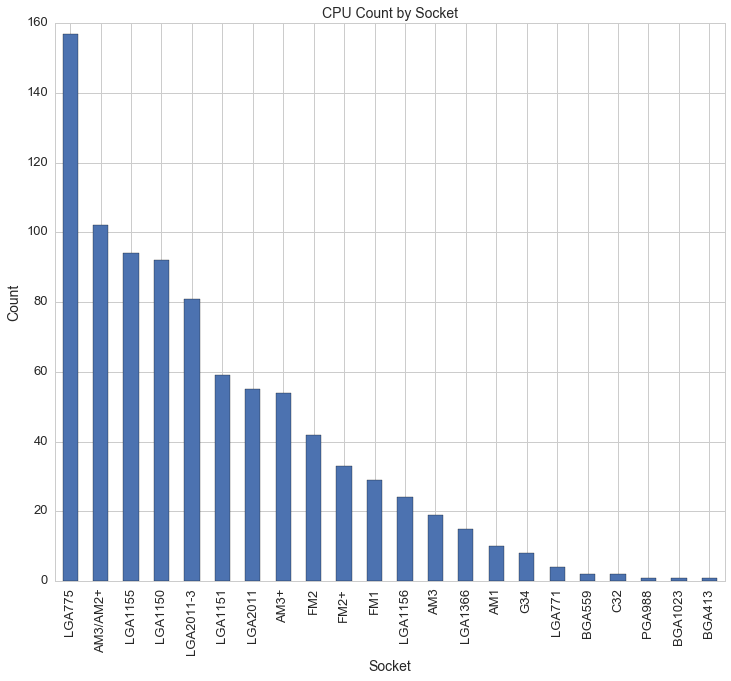

In [287]:
df.Socket.value_counts().plot(kind='bar', figsize=(12,10))
plt.title('CPU Count by Socket', fontsize=14)
plt.xlabel('Socket', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu/socket_types.png'))

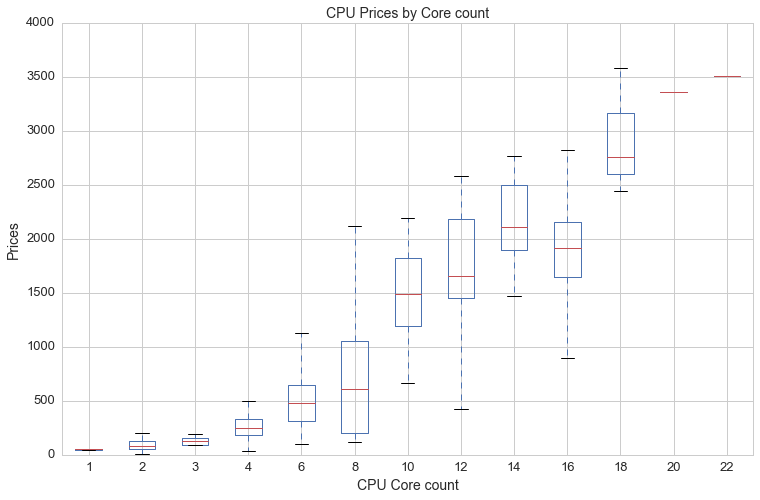

In [285]:
df[(df.cores>0)&(df.avg>0)].boxplot(column='avg', by='cores', figsize=(12,8))
plt.suptitle('')
plt.title('CPU Prices by Core count', fontsize=14)
plt.xlabel('CPU Core count', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu/price_by_core.png'))

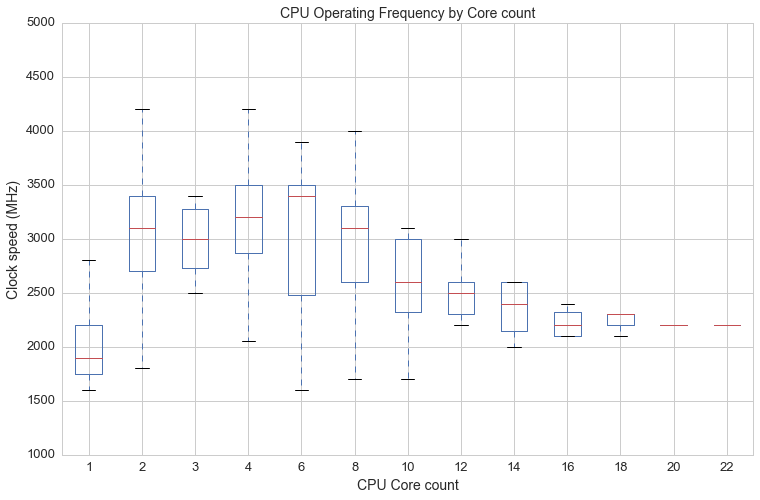

In [295]:
df[(df.cores>0)&(df.avg>0)].boxplot(column='opfreq', by='cores', figsize=(12,8))
plt.suptitle('')
plt.title('CPU Operating Frequency by Core count', fontsize=14)
plt.xlabel('CPU Core count', fontsize=14)
plt.ylabel('Clock speed (MHz)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu/speed_vs_cores.png'))

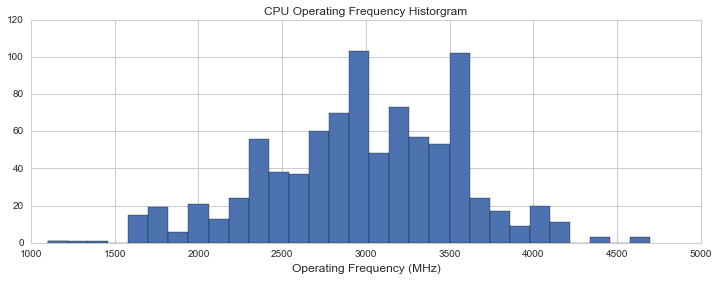

In [194]:
plt.figure(figsize=(12,4))
df.opfreq.hist(bins=30)
plt.title('CPU Operating Frequency Historgram', fontsize=12)
plt.xlabel('Operating Frequency (MHz)', fontsize=12)

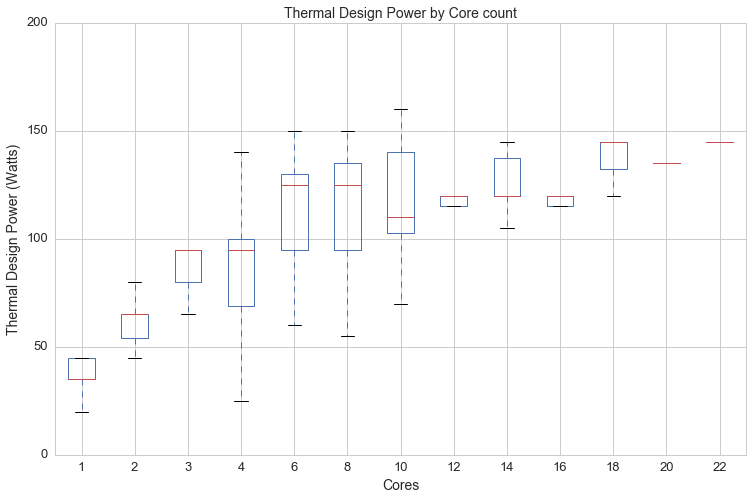

In [299]:
df.boxplot(column='TDP', by='Cores', figsize=(12,8))
plt.suptitle('')
plt.ylim(0,200)
plt.title('Thermal Design Power by Core count', fontsize=14)
plt.xlabel('Cores', fontsize=14)
plt.ylabel('Thermal Design Power (Watts)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu/tdp_by_cores.png'))

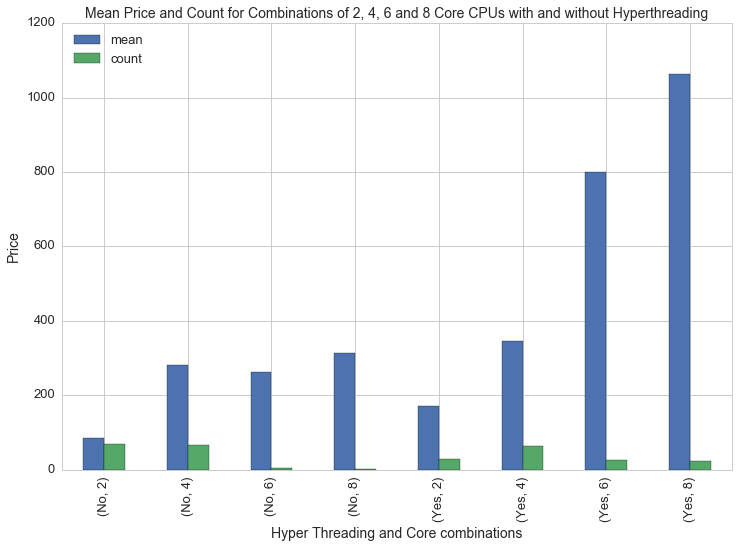

In [14]:
df['Hyper_Threading'] = df['Hyper-Threading']
df[(df.Manufacturer=='Intel')&(df.avg>0)&((df.Cores==4)|(df.Cores==2)|(df.Cores==6)|(df.Cores==8))].groupby(['Hyper_Threading','Cores']).avg.agg(['mean', 'count']).plot(kind='bar', figsize=(12,8))
plt.xlabel('Hyper Threading and Core combinations', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Mean Price and Count for Combinations of 2, 4, 6 and 8 Core CPUs with and without Hyperthreading', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13, loc='upper left')
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu/hyper_threading_prices.png'))

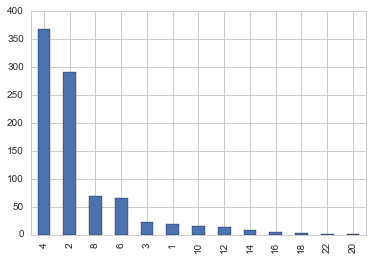

In [166]:
df.Cores.value_counts().plot(kind='bar')


In [304]:
df_ = df[(df['Hyper-Threading']=="Yes")&(df.Manufacturer=='AMD')]

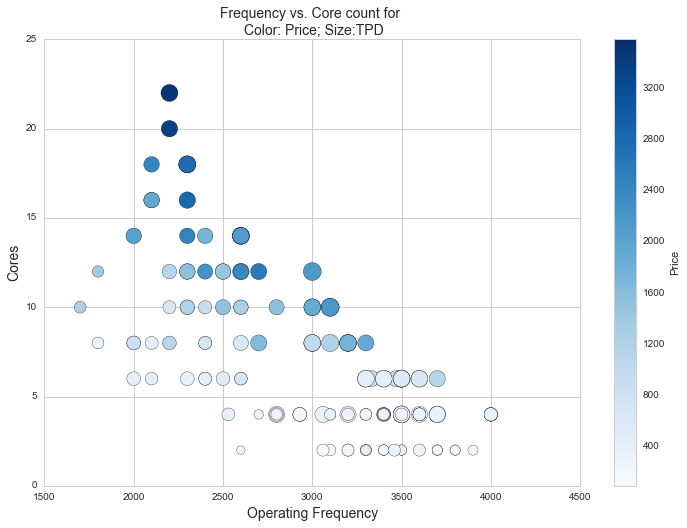

In [294]:
plt.figure(figsize=(12,8))
df2 = df[(df.avg>0)&(df['Hyper-Threading']=="Yes")]
plt.scatter(df2.opfreq, df2.Cores, c=df2.avg, s=df2.TDP*2, cmap='Blues')
plt.colorbar(label='Price')
plt.title('Frequency vs. Core count for \n Color: Price; Size:TPD', fontsize=14)
plt.ylabel('Cores', fontsize=14)
plt.xlabel('Operating Frequency', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu/freq_v_cores.png'))

In [5]:
sns.set_style('whitegrid')

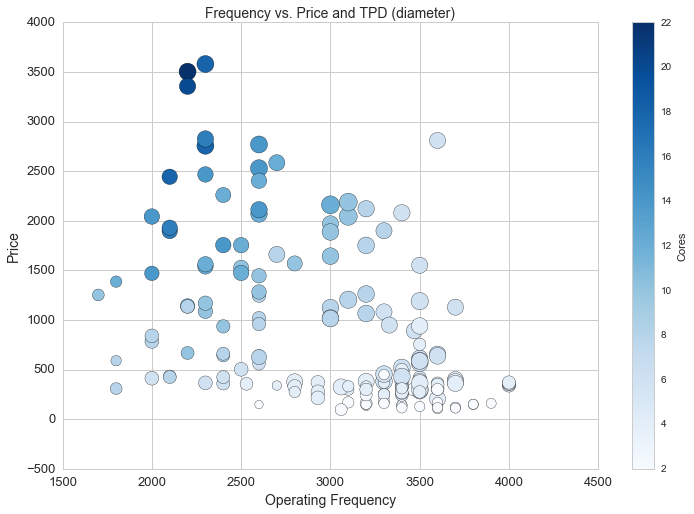

In [6]:
plt.figure(figsize=(12,8))
df2 = df[(df.avg>0)&(df['Hyper-Threading']=="Yes")]
plt.scatter(df2.opfreq, df2.avg, c=df2.Cores, s=df2.TDP*2, cmap='Blues')
plt.colorbar(label='Cores')
plt.title('Frequency vs. Price and TPD (diameter)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Operating Frequency', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/cpu/freq_v_price.png'))